### Project on Diwali sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df=pd.read_csv(r'C:\Users\Abhishek\Desktop\Copywriting\Futurelytic_course_practice\Data analytics with Python\Portfolio_project\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding='unicode_escape')
df.shape
df.head()

(11251, 15)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:

# they have 0 values, so remove the columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)


In [7]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Drop all null values
df.dropna(inplace=True) 

In [10]:
df.shape

(11239, 13)

In [11]:

#converting amount column to int
df['Amount']=df['Amount'].astype('int')


In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Exploratory data analysis

### Gender

[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]


[Text(0, 0, '4573'), Text(0, 0, '1945')]

[Text(0, 0, '3259'), Text(0, 0, '1462')]

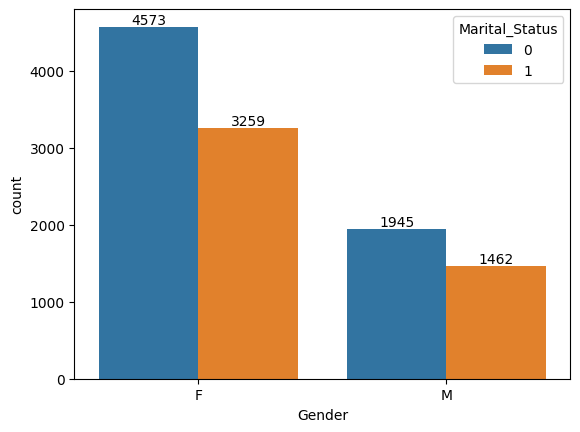

In [13]:
ax=sns.countplot(x='Gender', hue="Marital_Status", data=df)

print(ax.containers)

for bars in ax.containers:
    ax.bar_label(bars)

[<BarContainer object of 2 artists>]


[Text(0, 0, '7832'), Text(0, 0, '3407')]

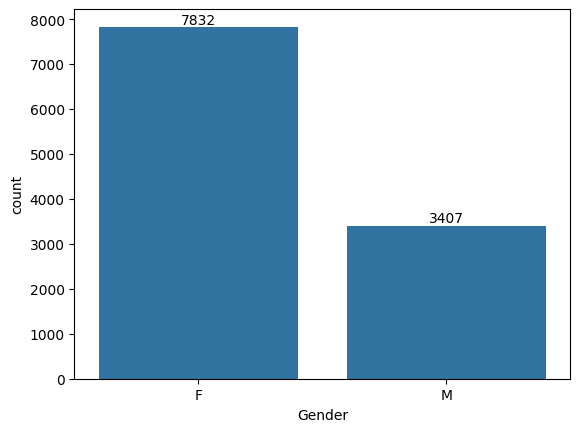

In [14]:
ax=sns.countplot(x='Gender', data=df)
print(ax.containers)

for bars in ax.containers:
    ax.bar_label(bars)

In [15]:
df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

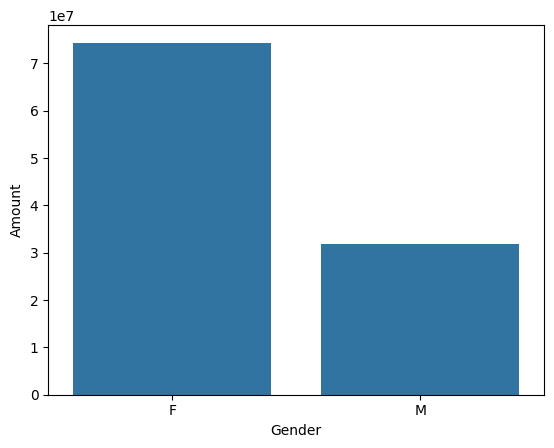

In [16]:
# plotting a bar chart for gender vs total amount
sales_gen=df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

[Text(0, 0, '3269'),
 Text(0, 0, '162'),
 Text(0, 0, '1305'),
 Text(0, 0, '553'),
 Text(0, 0, '693'),
 Text(0, 0, '272'),
 Text(0, 0, '1578')]

[Text(0, 0, '1272'),
 Text(0, 0, '134'),
 Text(0, 0, '574'),
 Text(0, 0, '277'),
 Text(0, 0, '290'),
 Text(0, 0, '155'),
 Text(0, 0, '705')]

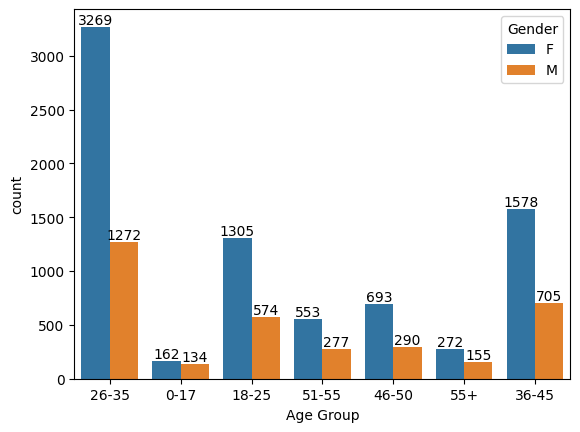

In [18]:
ax=sns.countplot(x='Age Group', hue='Gender', data=df)

for bar in ax.containers:
    ax.bar_label(bar)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Age Group', ylabel='Amount'>

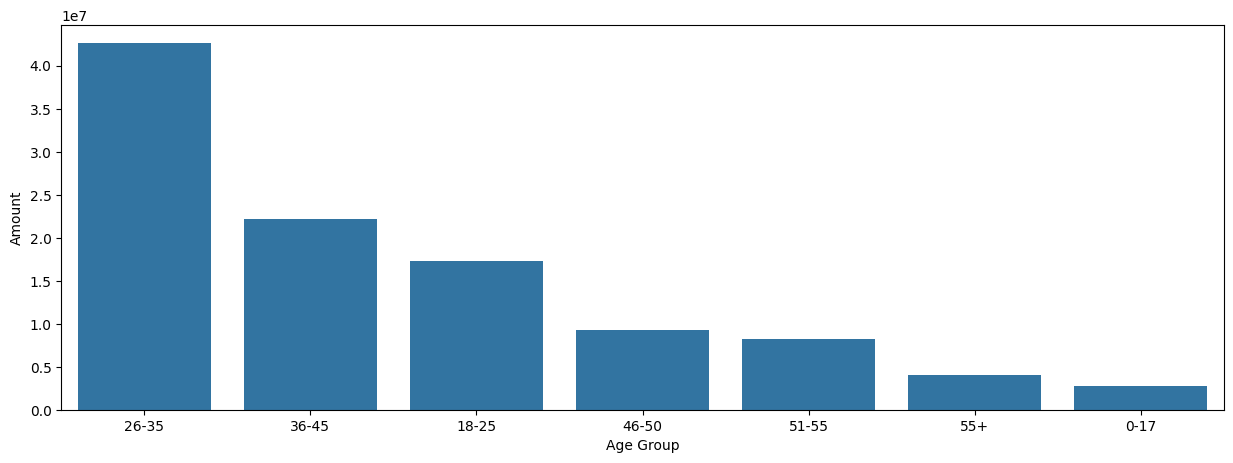

In [19]:
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='Age Group' ,y='Amount', data=sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

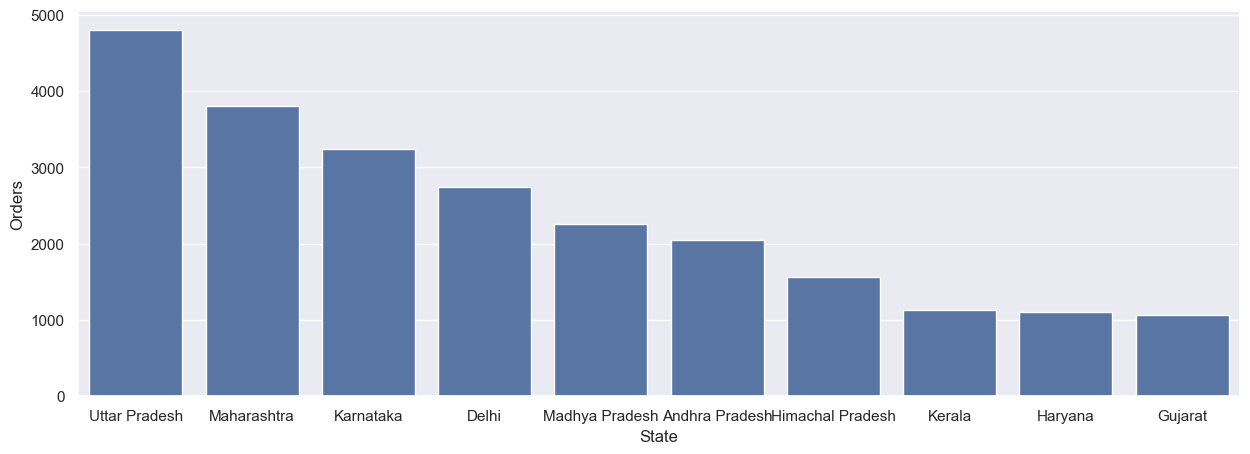

In [21]:
sales_state=df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Orders', data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

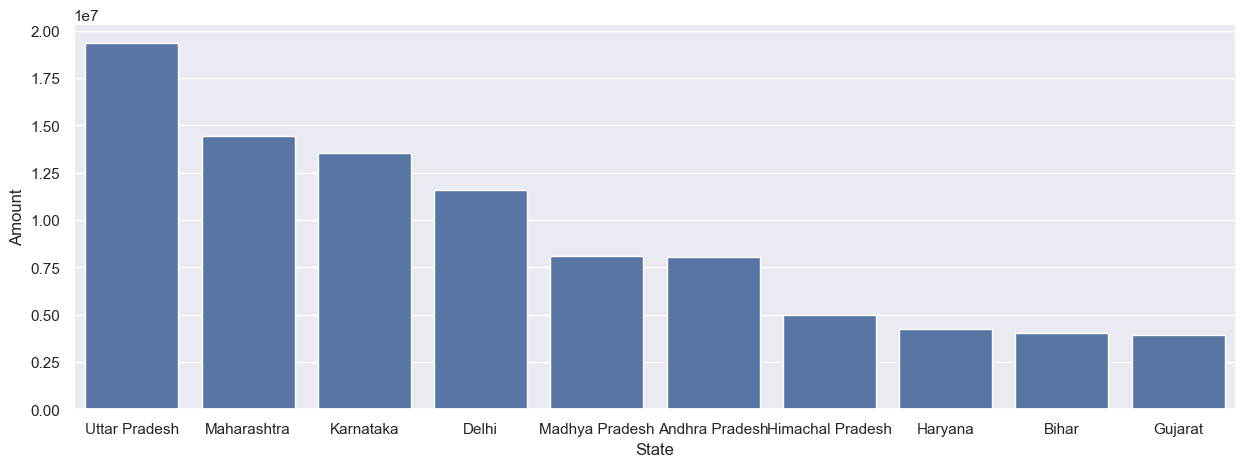

In [22]:
sales_state=df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Amount', data=sales_state)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital status

<Figure size 1000x400 with 0 Axes>

[Text(0, 0, '6518'), Text(0, 0, '4721')]

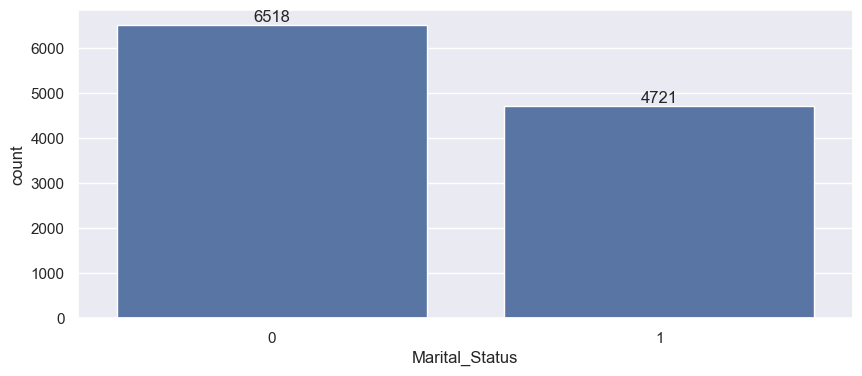

In [23]:
plt.figure(figsize=(10,4))

ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)




<Axes: xlabel='Marital_Status', ylabel='Amount'>

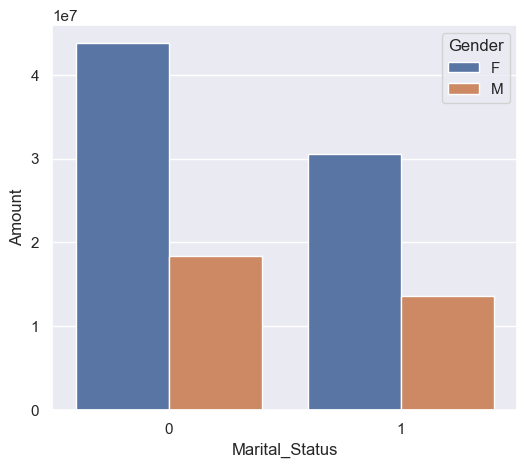

In [24]:
marital_data=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=marital_data)


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Figure size 2000x500 with 0 Axes>

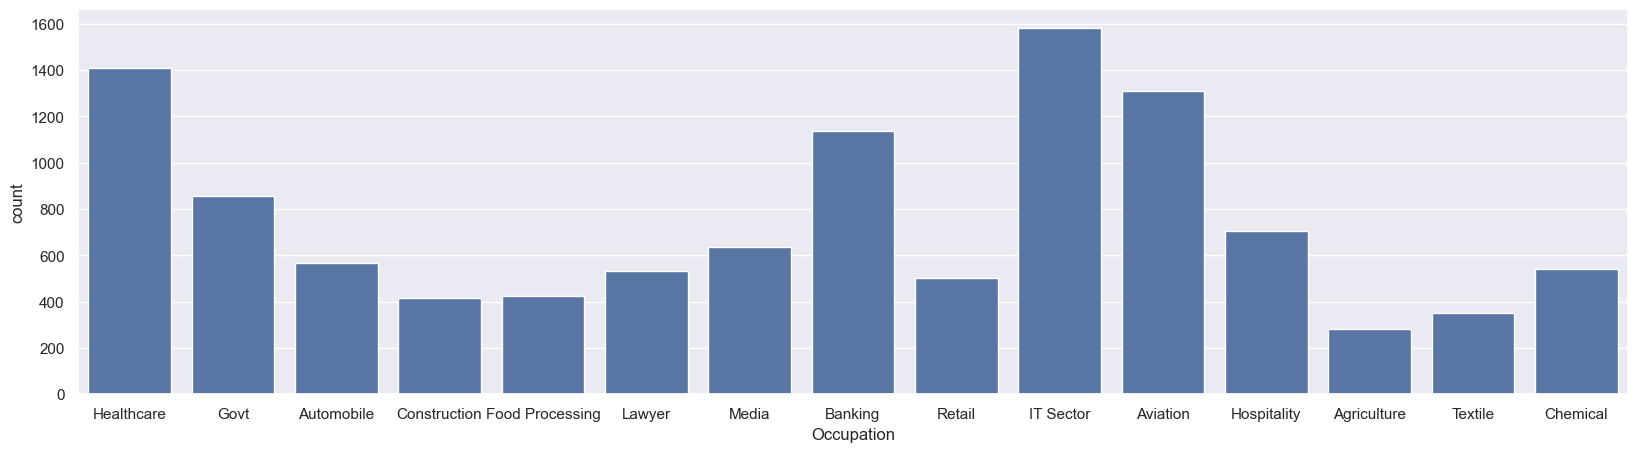

In [26]:
plt.figure(figsize=(20,5))
occup_count=sns.countplot(x='Occupation', data=df)

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Occupation', ylabel='Amount'>

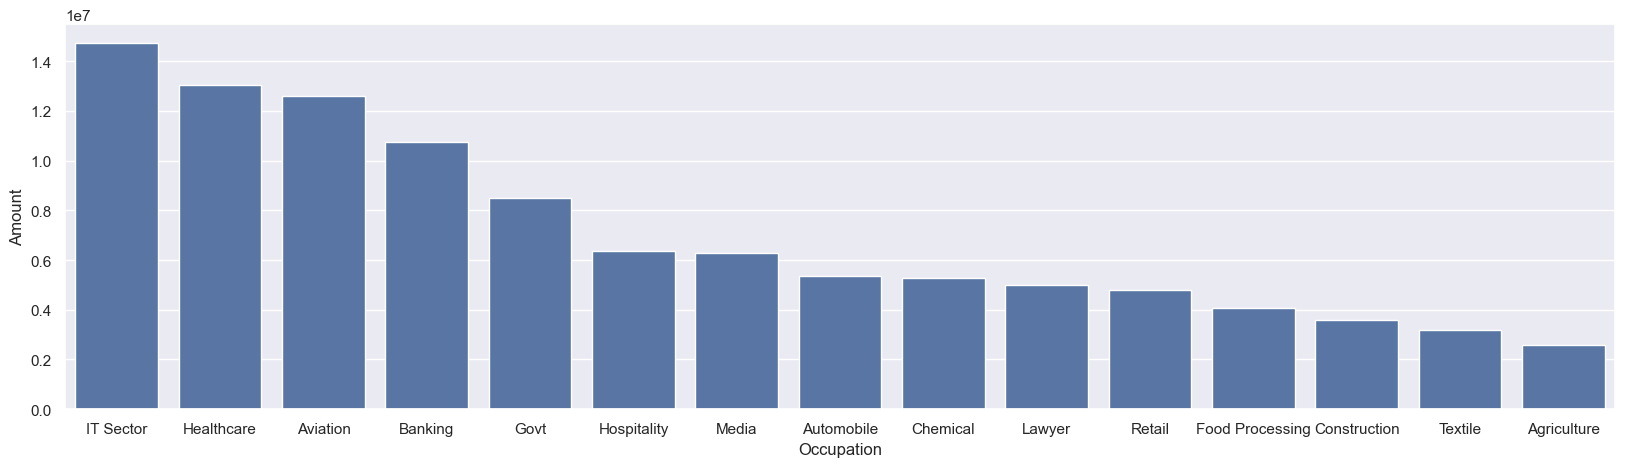

In [27]:
occup_data=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x='Occupation', y='Amount', data=occup_data)


**From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

### Product Category

<Figure size 2700x600 with 0 Axes>

[Text(0, 0, '97'),
 Text(0, 0, '26'),
 Text(0, 0, '112'),
 Text(0, 0, '72'),
 Text(0, 0, '1059'),
 Text(0, 0, '352'),
 Text(0, 0, '2490'),
 Text(0, 0, '386'),
 Text(0, 0, '356'),
 Text(0, 0, '103'),
 Text(0, 0, '2087'),
 Text(0, 0, '96'),
 Text(0, 0, '2655'),
 Text(0, 0, '422'),
 Text(0, 0, '520'),
 Text(0, 0, '212'),
 Text(0, 0, '81'),
 Text(0, 0, '113')]

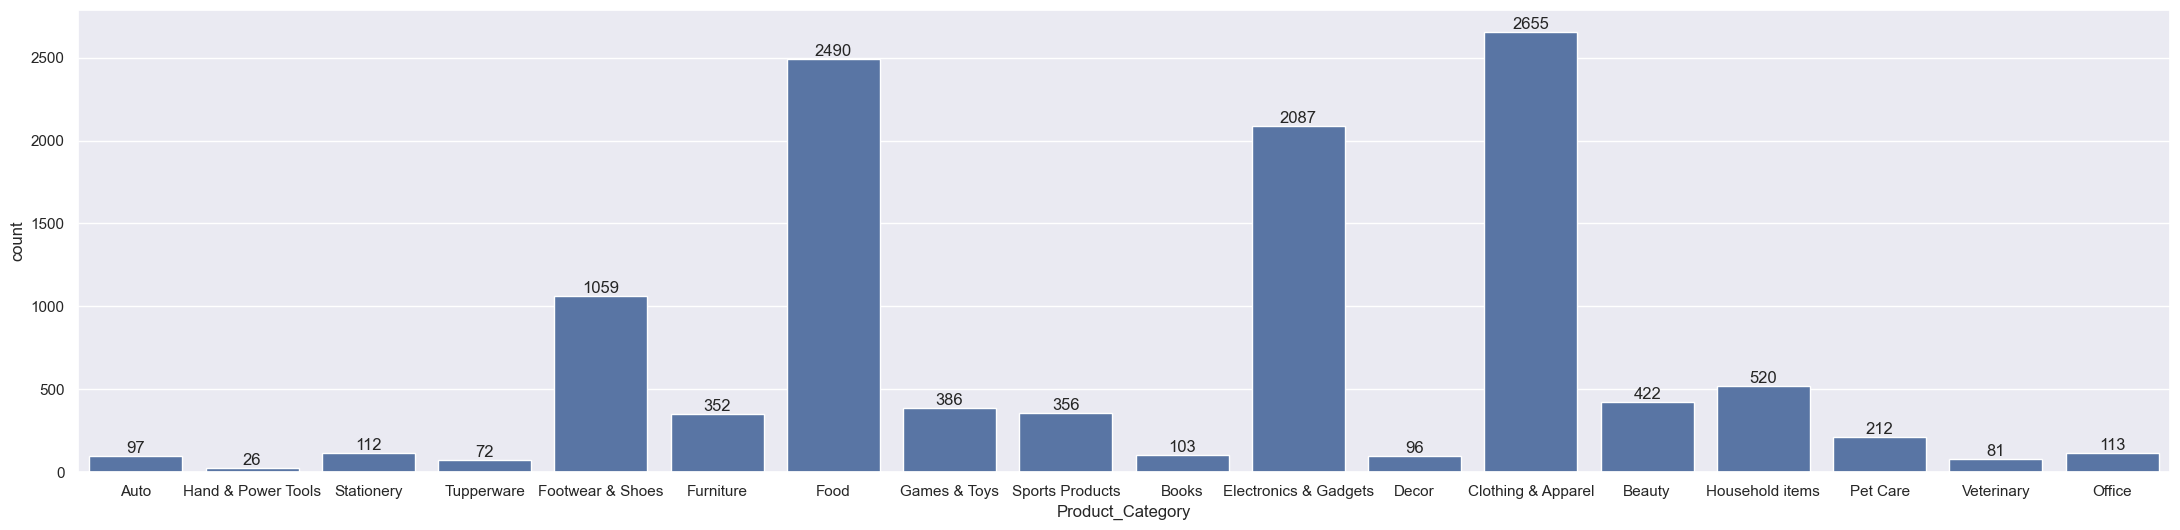

In [35]:
plt.figure(figsize=(27,6))
prod_count=sns.countplot(x='Product_Category', data=df)

for bar in prod_count.containers:
    prod_count.bar_label(bar)


<Figure size 2500x500 with 0 Axes>

<Axes: xlabel='Product_Category', ylabel='Amount'>

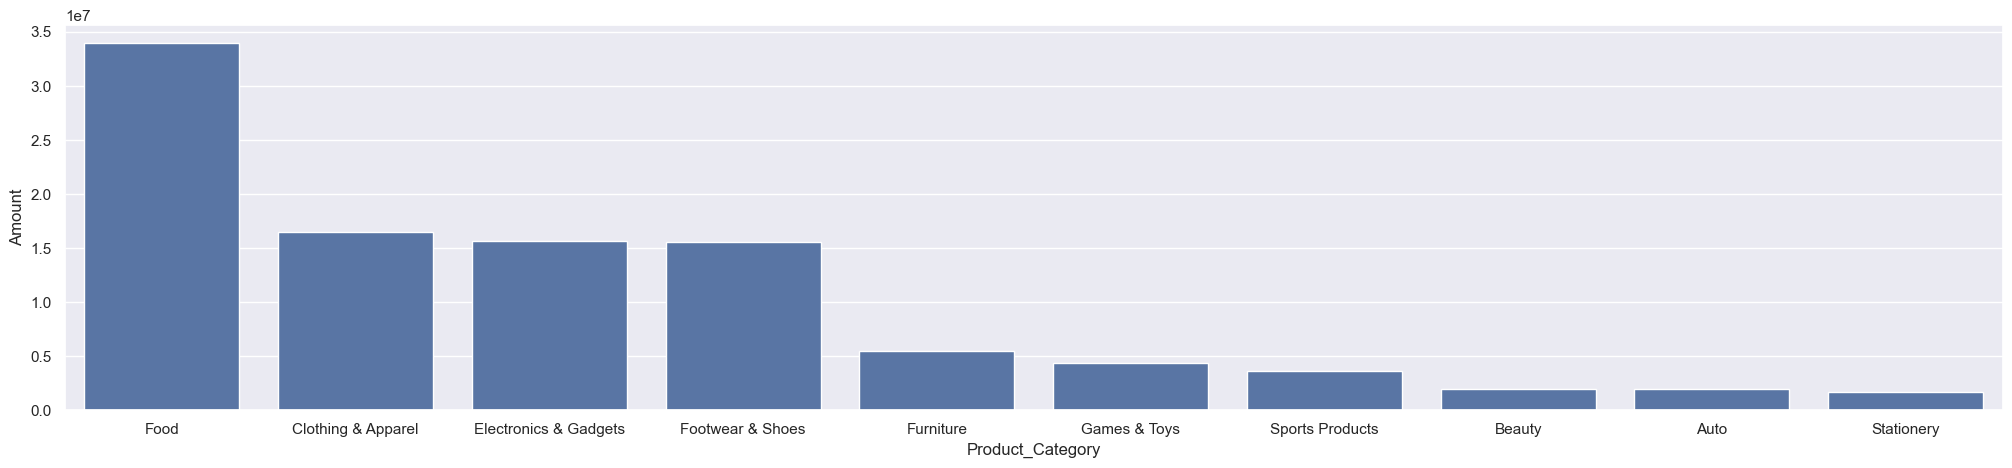

In [41]:
prod_cat=df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(25,5))
sns.barplot(x='Product_Category', y='Amount', data=prod_cat)


*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

### Product

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Product_ID', ylabel='Amount'>

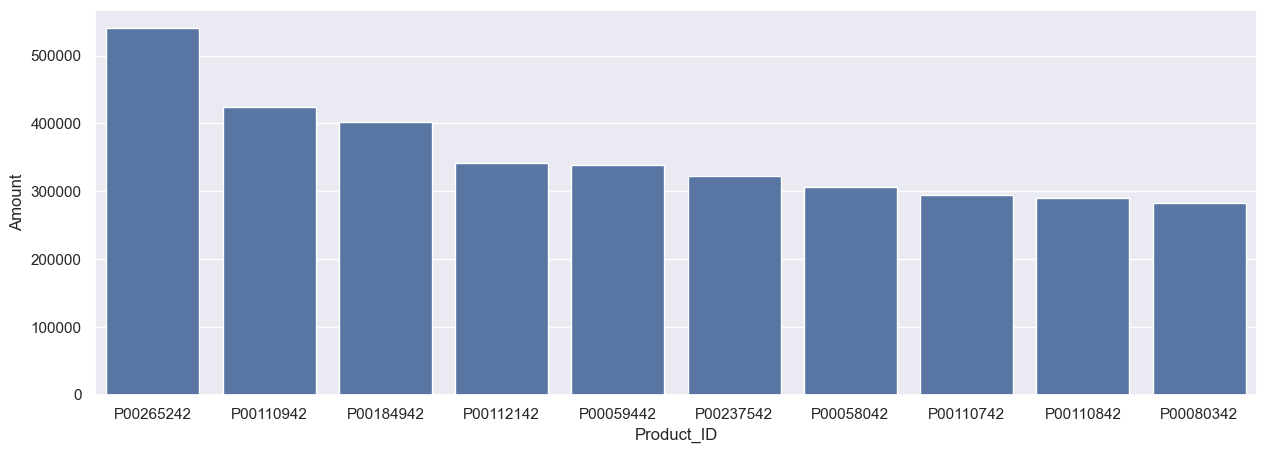

In [43]:
# prod=sns.countplot(x='Product_ID', data=df)
prod_sales=df.groupby('Product_ID', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='Product_ID', y='Amount', data=prod_sales)